In [60]:
%matplotlib widget

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
def coloc_mat(pts):
    """Genera la matriz de colocación

    Parámetros
    ----------
    pts : ndarray
        Puntos de colocación.

    Retorna
    -------
    mat : ndarray
        Matriz de colocación.
    """
    pts = np.asarray(pts)
    N = pts.shape[0]
    mat = np.zeros((N, N))
    for row, pt in enumerate(pts):
        for col in range(N):
            k = col + 1
            mat[row, col] = k*pt**(k - 2)*((k + 1)*pt - k + 1)

    return mat


def eval_sol(x_eval, coefs):
    sol = np.zeros_like(x_eval)
    for k, c in enumerate(coefs):
        sol += c * x_eval * (x_eval - 1) * x_eval**k
    return sol

In [81]:
N = 100
pts = np.linspace(0, 1, N + 2)
mat = coloc_mat(pts[1:-1])
f = lambda x: -np.sin(8*np.pi*x)
rhs = [f(pt) for pt in pts[1:-1]]

In [82]:
coefs = np.linalg.solve(mat, rhs)

In [83]:
x_eval = np.linspace(0, 1, 101)
y_eval = eval_sol(x_eval, coefs)

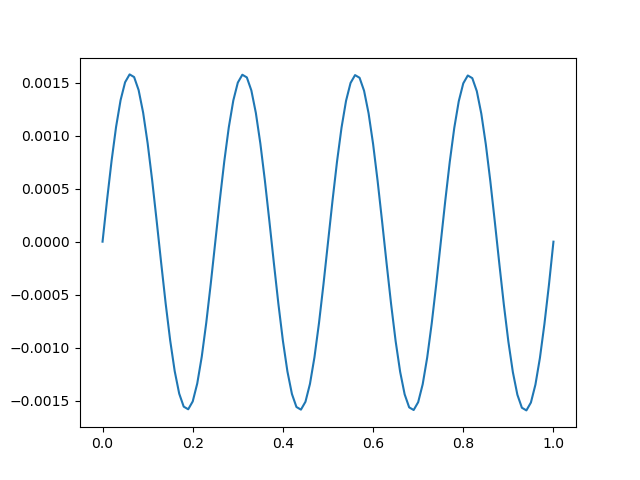

In [84]:
plt.figure()
#plt.plot(x_eval, -x_eval*(x_eval - 1)*(x_eval + 1)/6)
plt.plot(x_eval, y_eval)